# Introdução a Econometria - Parte II

## Recapitulação - O que vimos na parte I?

Principais conceitos abordados foram:

- **Modelo de Regressão Linear Simples**
- **Modelo de Regressão Linear Múltipla**
- **Estimação dos Parâmetros**
- **Cross Section**
- **Multicolinearidade**
- **Heterocedasticidade**
- **R²**
- **P-Value**
- **Beta**

## O que veremos na parte II?

- **Series Temporais**
- **Principais Conceitos**
- **Problemas comuns**
- **Autocorrelação**
- **Estacionariedade**
- **Processos Estocásticos**
- **Defasagem**




In [1]:
## Importando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import wooldridge as woo

In [13]:
## Carregando a base de dados de exemplo do Wooldridge 
data = woo.dataWoo('intdef')

data.set_index('year', inplace=True)
data

,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
year,,,,,,,,,,,,
1948,1.04,8.1,16.200001,11.600000,-4.600000,NaN,NaN,NaN,NaN,NaN,NaN,0
1949,1.10,-1.2,14.500000,14.300000,-0.200000,1.04,8.1,-4.600000,0.060000,-9.3,4.400001,0
1950,1.22,1.3,14.400000,15.600000,1.200001,1.10,-1.2,-0.200000,0.120000,2.5,1.400001,0
1951,1.55,7.9,16.100000,14.200000,-1.900001,1.22,1.3,1.200001,0.330000,6.6,-3.100001,0
1952,1.77,1.9,19.000000,19.400000,0.400000,1.55,7.9,-1.900001,0.220000,-6.0,2.300000,0
1953,1.93,0.8,18.700001,20.400000,1.699999,1.77,1.9,0.400000,0.160000,-1.1,1.299999,0
1954,0.95,0.7,18.500000,18.799999,0.299999,1.93,0.8,1.699999,-0.980000,-0.1,-1.400000,0
1955,1.75,-0.4,16.500000,17.299999,0.799999,0.95,0.7,0.299999,0.800000,-1.1,0.500000,0
1956,2.66,1.5,17.500000,16.500000,-1.000000,1.75,-0.4,0.799999,0.910000,1.9,-1.799999,0


In [16]:
data.columns

Index(['i3', 'inf', 'rec', 'out', 'def', 'i3_1', 'inf_1', 'def_1', 'ci3',
       'cinf', 'cdef', 'y77'],
      dtype='object')

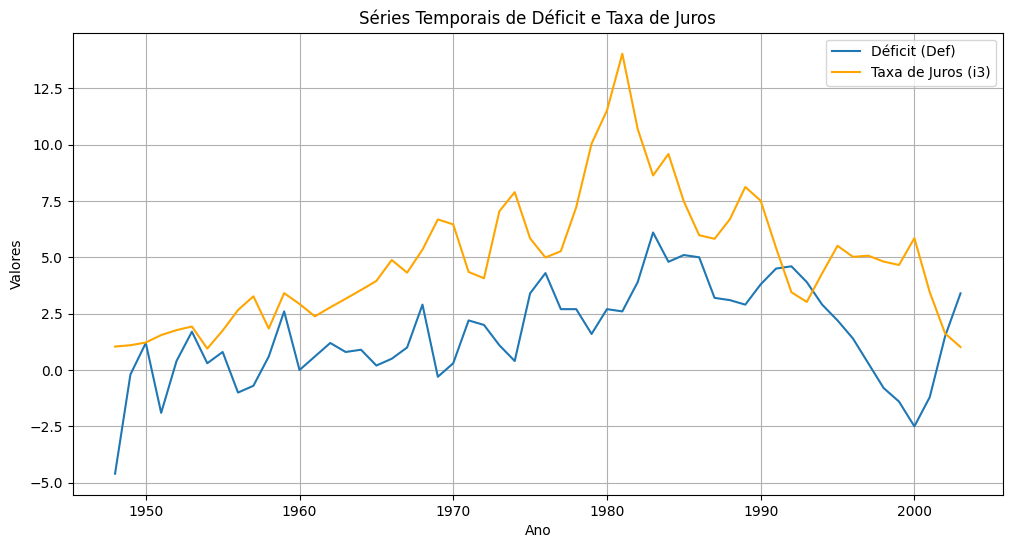

In [17]:
# Plotar a série temporal do deficit e taxa de juros
plt.figure(figsize=(12, 6))
plt.plot(data['def'], label='Déficit (Def)')
plt.plot(data['i3'], label='Taxa de Juros (i3)', color='orange')
plt.title('Séries Temporais de Déficit e Taxa de Juros')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.legend()
plt.grid()
plt.show()


Aqui, estamos realizando uma regressão linear simples, onde a variável independente é a taxa de juros (i3) e a variável dependente é o déficit (def). Adicionamos uma constante ao modelo para incluir o intercepto. O método fit() ajusta o modelo aos dados, e o summary() fornece informações detalhadas sobre os resultados da regressão, incluindo coeficientes, valores p e R².

In [36]:
# Regressão simples
X = sm.add_constant(data['i3'].dropna())  # Adiciona a constante para o modelo
y = data['def'].dropna()  # Definindo a variável dependente (déficit)

# Ajustando o modelo de regressão
model_1 = sm.OLS(y, X).fit()

# Resumo do modelo
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    def   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     12.96
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           0.000692
Time:                        10:51:36   Log-Likelihood:                -114.73
No. Observations:                  56   AIC:                             233.5
Df Residuals:                      54   BIC:                             237.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0138      0.510      0.027      0.9

Nesta seção, estamos analisando os resíduos do modelo para verificar se há autocorrelação, que pode indicar problemas na especificação do modelo. O gráfico da ACF (Função de Autocorrelação) nos ajuda a visualizar a autocorrelação. Em seguida, realizamos o teste de Dickey-Fuller para verificar a estacionariedade dos resíduos; resíduos estacionários são desejáveis em modelos de regressão, pois indicam que não há padrões sistemáticos nos erros.

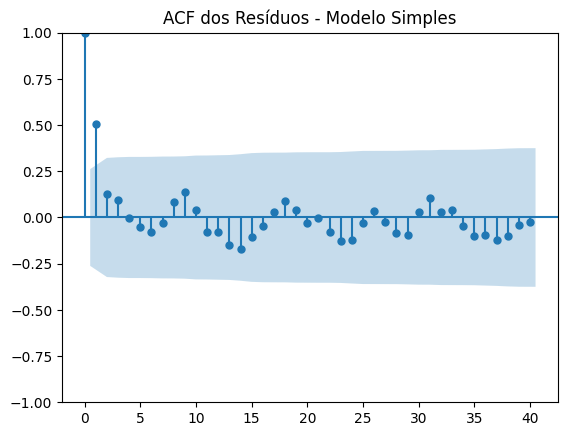

Estatística ADF: -4.0738508107261495
Valor p: 0.0010695361769703434

Os resíduos são estacionários.


In [38]:
# Resíduos do modelo
residuos = model_1.resid

# Teste de autocorrelação dos resíduos
# A Função de Autocorrelação (ACF) mede a correlação entre os resíduos do modelo e eles mesmos em diferentes defasagens (lags).
# Isso ajuda a identificar se há padrões repetitivos ou sazonais nos resíduos, o que pode indicar problemas no modelo.
sm.graphics.tsa.plot_acf(residuos, lags=40)
plt.title('ACF dos Resíduos - Modelo Simples')
plt.show()

# Teste de Dickey-Fuller para verificar a estacionariedade dos resíduos
# O teste de Dickey-Fuller aumentado (ADF) é usado para verificar se os resíduos são estacionários.
# Resíduos estacionários indicam que o modelo capturou bem a estrutura da série temporal.
result = adfuller(residuos)
print(f'Estatística ADF: {result[0]}')
print(f'Valor p: {result[1]}')
if result[1] < 0.05:
    print("\nOs resíduos são estacionários.")
else:
    print("\nOs resíduos não são estacionários.")

Agora estamos expandindo nosso modelo para incluir mais variáveis explicativas, como inflação (inf) e recuperação (rec). Isso nos permitirá entender melhor como múltiplos fatores afetam o déficit. O processo é similar ao da regressão simples, mas aqui estamos tentando capturar a relação entre o déficit e mais de uma variável.

In [39]:
# Regressão múltipla
X_multi = sm.add_constant(data[['i3', 'inf', 'rec']].dropna())  # Adiciona a constante para o modelo
y_multi = data['def'].dropna()  # Variável dependente (déficit)

# Ajustando o modelo de regressão múltipla
model_2 = sm.OLS(y_multi, X_multi).fit()

# Resumo do modelo
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    def   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     12.23
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           3.60e-06
Time:                        10:52:51   Log-Likelihood:                -105.80
No. Observations:                  56   AIC:                             219.6
Df Residuals:                      52   BIC:                             227.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9173      3.600      3.589      0.0

Após ajustar o modelo múltiplo, repetimos os testes de diagnóstico para avaliar os resíduos. A análise da ACF e o teste de Dickey-Fuller são essenciais para garantir que o modelo não apresenta problemas de autocorrelação ou não estacionariedade nos resíduos. Isso é importante para validar a eficácia do modelo.

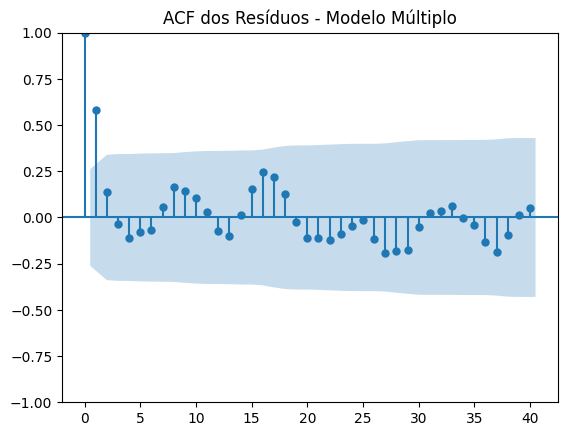

Estatística ADF: -4.61364059526546
Valor p: 0.00012189482763190395
Os resíduos são estacionários.


In [40]:
# Resíduos do modelo múltiplo
residuos_multi = model_2.resid

# Teste de autocorrelação dos resíduos
sm.graphics.tsa.plot_acf(residuos_multi, lags=40)
plt.title('ACF dos Resíduos - Modelo Múltiplo')
plt.show()

# Teste de Dickey-Fuller para verificar a estacionariedade dos resíduos
result_multi = adfuller(residuos_multi)
print(f'Estatística ADF: {result_multi[0]}')
print(f'Valor p: {result_multi[1]}')
if result_multi[1] < 0.05:
    print("Os resíduos são estacionários.")
else:
    print("Os resíduos não são estacionários.")

Nesta seção, estamos refinando nosso modelo ao incluir defasagens das variáveis explicativas. Isso é útil em econometria porque muitos fenômenos econômicos apresentam efeitos retardados. Removemos as linhas com valores ausentes após adicionar as defasagens e ajustamos o modelo novamente. O resumo nos permite verificar se a adição das defasagens melhorou o modelo.

In [42]:
# Adicionar defasagens das variáveis
data['l_i3'] = data['i3'].shift(1)  # Defasagem da taxa de juros
data['l_inf'] = data['inf'].shift(1)  # Defasagem da inflação
data['l_rec'] = data['rec'].shift(1)  # Defasagem da recuperação

# Remover linhas com valores ausentes
data_clean = data.dropna()

# Regressão com variáveis defasadas
X_refined = sm.add_constant(data_clean[['i3', 'inf', 'rec', 'l_i3', 'l_inf', 'l_rec']])
y_refined = data_clean['def']

model_3 = sm.OLS(y_refined, X_refined).fit()

# Resumo do modelo refinado
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    def   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     9.699
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           5.51e-07
Time:                        10:54:27   Log-Likelihood:                -92.462
No. Observations:                  55   AIC:                             198.9
Df Residuals:                      48   BIC:                             213.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8256      3.407      4.058      0.0

Finalmente, realizamos novamente os testes de diagnóstico no modelo refinado. A verificação da autocorrelação dos resíduos e a estacionariedade são cruciais para garantir que o modelo é robusto e confiável. Se os resíduos são estacionários e não apresentam autocorrelação, isso sugere que o modelo está bem especificado.

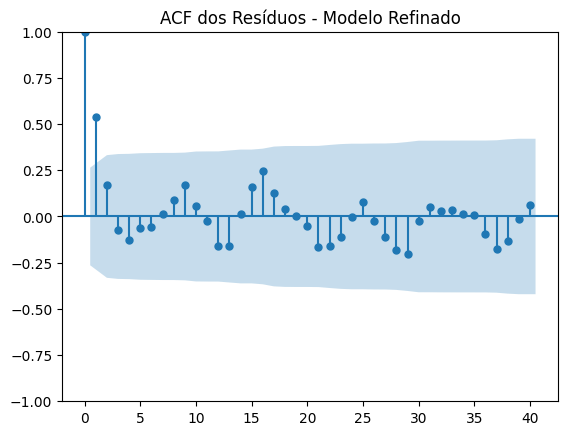

Estatística ADF: -3.987091618693834
Valor p: 0.0014796322269122642
Os resíduos são estacionários.


In [43]:
# Resíduos do modelo refinado
residuos_refined = model_3.resid

# Teste de autocorrelação dos resíduos
sm.graphics.tsa.plot_acf(residuos_refined, lags=40)
plt.title('ACF dos Resíduos - Modelo Refinado')
plt.show()

# Teste de Dickey-Fuller para verificar a estacionariedade dos resíduos
result_refined = adfuller(residuos_refined)
print(f'Estatística ADF: {result_refined[0]}')
print(f'Valor p: {result_refined[1]}')
if result_refined[1] < 0.05:
    print("Os resíduos são estacionários.")
else:
    print("Os resíduos não são estacionários.")

In [45]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Teste de Breusch-Pagan
bp_test = het_breuschpagan(residuos_refined, X_refined)
bp_results = dict(zip(['LM Statistic', 'LM Test p-value', 'F Statistic', 'F Test p-value'], bp_test))

print("Resultados do Teste de Breusch-Pagan:")
for key, value in bp_results.items():
    print(f"{key}: {value:.4f}")

if bp_results['LM Test p-value'] < 0.05:
    print("\nA heterocedasticidade foi detectada.")
else:
    print("\nNenhuma evidência de heterocedasticidade.")


Resultados do Teste de Breusch-Pagan:
LM Statistic: 13.9003
LM Test p-value: 0.0308
F Statistic: 2.7057
F Test p-value: 0.0241

A heterocedasticidade foi detectada.


In [46]:
# Reajustando o modelo com erros padrão robustos
model_robust = sm.OLS(y_refined, X_refined).fit(cov_type='HC3')

# Resumo do modelo com erros robustos
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                    def   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     6.730
Date:                Sat, 26 Oct 2024   Prob (F-statistic):           3.23e-05
Time:                        10:59:39   Log-Likelihood:                -92.462
No. Observations:                  55   AIC:                             198.9
Df Residuals:                      48   BIC:                             213.0
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8256      6.400      2.160      0.0

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculando o VIF para cada variável
vif_data = pd.DataFrame()
vif_data['Variável'] = X_refined.columns
vif_data['VIF'] = [variance_inflation_factor(X_refined.values, i) for i in range(X_refined.shape[1])]

print(vif_data)

  Variável         VIF
0    const  329.767824
1       i3    6.757649
2      inf    3.049824
3      rec    2.186506
4     l_i3    5.991592
5    l_inf    2.460466
6    l_rec    2.317592
